# Data Analysis over the Clusters
## Loading libraries

In [1]:
import numpy as np
import cygnus_lib as cy
import toolslib as tl
import matplotlib.pyplot as plt
import pandas as pd
from time import time
from ast import literal_eval
from math import degrees

## font definition
%matplotlib inline
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Bitstream Vera Sans']
plt.rcParams['font.serif'] = ['Bitstream Vera Sans']

## Variables definition

In [2]:
x_resolution = y_resolution = 2048
rescale      = 512
scale        = int(x_resolution/rescale)

## Loading data

List contain:

[0 - Run number, 1 - Image Number, 2 - Tag of the cluster, 3 - Pixel X position, 4 - Pixel Y position, 5 - Light in the pixel, 6 - Pedestal in the pixel]

In [3]:
tic=time()
#------------------- Loading File ------------------------------#
directory = ("./data/")          # Directory of the output file
filename  = ("ClustersTable")    # Name of the output file
extension = (".csv")             # Extension of the output file
dataout = directory + filename + extension # Full path of the output file

dt = {'Run': np.int64, 'Image': np.int64, 'Tag': np.object, 'X': np.object, 'Y': np.object, 'Light': np.object, 'Pedestal': np.object}
colhead = ["Run","Image","Tag","X","Y","Light","Pedestal"]
df = pd.read_csv(dataout,dtype=dt)

In [4]:
df.loc[:,'X'] = df.loc[:,'X'].apply(literal_eval)
df.loc[:,'Y'] = df.loc[:,'Y'].apply(literal_eval)
df.loc[:,'Light'] = df.loc[:,'Light'].apply(literal_eval)
df.loc[:,'Pedestal'] = df.loc[:,'Pedestal'].apply(literal_eval)
toc = time()

In [5]:
print("Loading time: %.2f" % ((toc-tic)/60))

Loading time: 11.91


In [6]:
# Showing the table
df.head(n = 10)

,Run,Image,Tag,X,Y,Light,Pedestal
0,494,0,m,"[808, 808, 808, 808, 809, 809, 809, 809, 810, ...","[40, 41, 42, 43, 40, 41, 42, 43, 40, 41, 42, 4...","[103, 96, 98, 103, 97, 129, 99, 120, 100, 98, ...","[103, 102, 101, 104, 100, 115, 102, 104, 104, ..."
1,494,0,m,"[652, 652, 652, 652, 653, 653, 653, 653, 654, ...","[112, 113, 114, 115, 112, 113, 114, 115, 112, ...","[98, 102, 99, 104, 103, 102, 101, 98, 103, 99,...","[99, 102, 103, 102, 102, 102, 100, 102, 102, 1..."
2,494,0,m,"[404, 404, 404, 404, 405, 405, 405, 405, 406, ...","[160, 161, 162, 163, 160, 161, 162, 163, 160, ...","[96, 101, 102, 103, 100, 100, 100, 98, 104, 10...","[96, 102, 102, 102, 99, 103, 102, 99, 102, 103..."
3,494,0,m,"[1272, 1272, 1272, 1272, 1273, 1273, 1273, 127...","[488, 489, 490, 491, 488, 489, 490, 491, 488, ...","[103, 96, 100, 103, 100, 105, 100, 100, 103, 1...","[102, 103, 103, 103, 103, 103, 106, 102, 102, ..."
4,494,0,m,"[1208, 1208, 1208, 1208, 1209, 1209, 1209, 120...","[724, 725, 726, 727, 724, 725, 726, 727, 724, ...","[99, 108, 106, 102, 102, 106, 111, 100, 101, 1...","[102, 103, 102, 102, 104, 102, 110, 102, 102, ..."
5,494,0,m,"[1516, 1516, 1516, 1516, 1517, 1517, 1517, 151...","[780, 781, 782, 783, 780, 781, 782, 783, 780, ...","[103, 108, 116, 100, 113, 111, 111, 110, 109, ...","[102, 102, 105, 102, 109, 103, 102, 103, 104, ..."
6,494,0,m,"[1484, 1484, 1484, 1484, 1485, 1485, 1485, 148...","[856, 857, 858, 859, 856, 857, 858, 859, 856, ...","[109, 100, 103, 98, 104, 101, 101, 110, 114, 1...","[103, 104, 104, 107, 103, 103, 106, 104, 104, ..."
7,494,0,m,"[700, 700, 700, 700, 701, 701, 701, 701, 702, ...","[996, 997, 998, 999, 996, 997, 998, 999, 996, ...","[133, 106, 106, 101, 100, 120, 113, 103, 103, ...","[135, 103, 102, 102, 104, 110, 105, 102, 103, ..."
8,494,0,m,"[516, 516, 516, 516, 517, 517, 517, 517, 518, ...","[1060, 1061, 1062, 1063, 1060, 1061, 1062, 106...","[100, 103, 102, 111, 103, 98, 99, 101, 100, 11...","[105, 102, 104, 107, 103, 103, 99, 103, 102, 1..."
9,494,0,m,"[804, 804, 804, 804, 805, 805, 805, 805, 806, ...","[1240, 1241, 1242, 1243, 1240, 1241, 1242, 124...","[107, 102, 102, 104, 109, 109, 114, 107, 111, ...","[100, 105, 104, 103, 105, 107, 109, 103, 103, ..."


In [7]:
variables = df.iloc[:,0:3].copy()
variables.head(n = 5)

,Run,Image,Tag
0,494,0,m
1,494,0,m
2,494,0,m
3,494,0,m
4,494,0,m


## Declaration  of the new variables

In [8]:
sl = np.zeros(df.shape[0],dtype=float)
sb = np.zeros(df.shape[0],dtype=float)
sp = np.zeros(df.shape[0],dtype=float)
co = np.zeros(df.shape[0],dtype=float)

In [9]:
## Loop to calculate the new variables

for ind in range(0,df.shape[0]):
    sl[ind] = np.sum(df.Light[ind])
    sb[ind] = np.sum(df.Pedestal[ind])
    sp[ind] = np.size(df.X[ind])
    co[ind] = np.abs(np.corrcoef(df.X[ind],df.Y[ind])[0][1])    
    #lenY[ind]  = np.mean(np.unique(df.X[ind],return_counts=True)[1]*scale)
    #lenX[ind]  = np.mean(np.unique(df.Y[ind],return_counts=True)[1]*scale)

In [10]:
# Insertion in the table
variables.insert(3,'SumLight',sl)
variables.insert(4,'SumPedestal',sb)
variables.insert(5,'SumPixels',sp)
variables.insert(6,'PhotonPPixels',(sl-sb)/sp)
variables.insert(7,'XYCorrelation',co)
variables.insert(8,'LightPPixel',sl/sp)

In [11]:
variables.head(n=10)

,Run,Image,Tag,SumLight,SumPedestal,SumPixels,PhotonPPixels,XYCorrelation,LightPPixel
0,494,0,m,639904.0,605129.0,5888.0,5.906080,0.680871,108.679348
1,494,0,m,276976.0,261851.0,2544.0,5.945362,0.693469,108.874214
2,494,0,m,283543.0,271467.0,2640.0,4.574242,0.716070,107.402652
3,494,0,m,223004.0,208398.0,2016.0,7.245040,0.234880,110.617063
4,494,0,m,933856.0,886972.0,8544.0,5.487360,0.876593,109.299625
5,494,0,m,152000.0,143567.0,1376.0,6.128634,0.826296,110.465116
6,494,0,m,441261.0,413057.0,3968.0,7.107863,0.452934,111.204889
7,494,0,m,180194.0,167429.0,1616.0,7.899134,0.665383,111.506188
8,494,0,m,241204.0,228315.0,2208.0,5.837409,0.115408,109.240942
9,494,0,m,153964.0,150582.0,1456.0,2.322802,0.280943,105.744505


In [12]:
variables[(variables.Tag == 'l') & (variables.PhotonPPixels < 5)]

,Run,Image,Tag,SumLight,SumPedestal,SumPixels,PhotonPPixels,XYCorrelation,LightPPixel
6930,494,83,l,4066372.0,3992954.0,38944.0,1.885220,0.336163,104.415879
6931,494,83,l,1239130.0,1198118.0,11680.0,3.511301,0.242340,106.089897
7933,494,93,l,5170105.0,4956233.0,47984.0,4.457152,0.097981,107.746436
18080,494,209,l,13862470.0,13572413.0,132880.0,2.182849,0.798478,104.323224
18081,494,209,l,1765949.0,1742871.0,17104.0,1.349275,0.573098,103.247720
18082,494,209,l,8106981.0,7801219.0,75600.0,4.044471,0.049161,107.235198
18083,494,209,l,965660.0,948860.0,9280.0,1.810345,0.267739,104.058190
25661,494,271,l,7176089.0,6885724.0,66688.0,4.354082,0.233786,107.606901


In [13]:
SLP = tl.getTaggedVariable(variables,'SumLight')
PPP = tl.getTaggedVariable(variables,'PhotonPPixels')
COR = tl.getTaggedVariable(variables,'XYCorrelation')
LPP = tl.getTaggedVariable(variables,'LightPPixel')

/usr/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


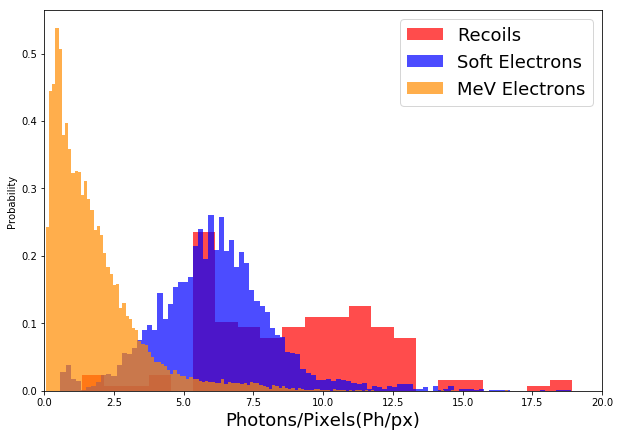

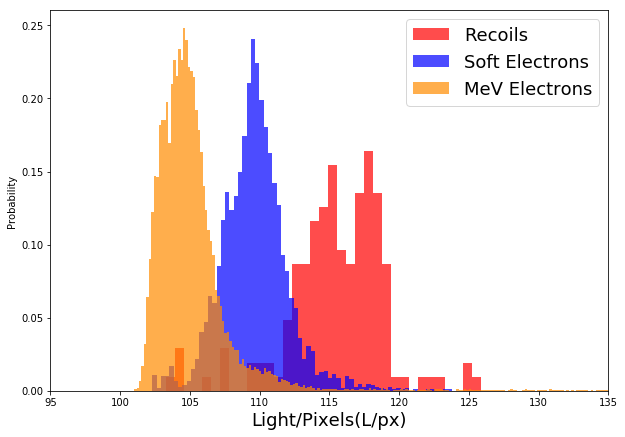

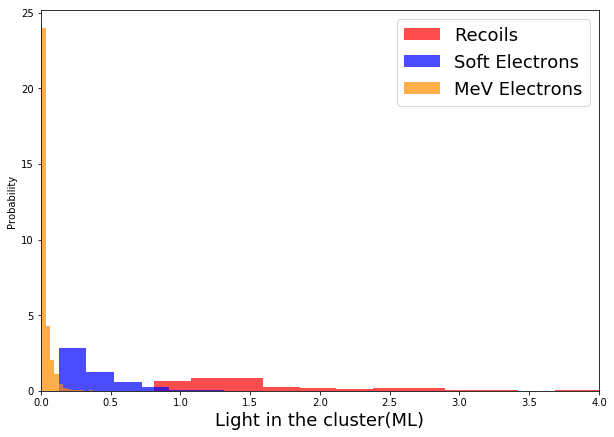

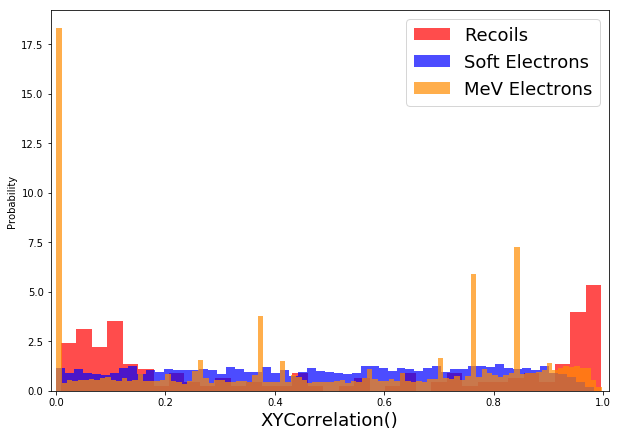

In [15]:
tl.plot2hist(PPP, bins = [25,100,400], liml = 0, limr = 20, label='Photons/Pixels', scale = '', unity = 'Ph/px', logx = False, logy = False)
tl.plot2hist(LPP, bins = [35,70,300], liml = 95, limr = 135, label='Light/Pixels', scale = '', unity = 'L/px', logx = False, logy = False)
tl.plot2hist(SLP, bins = [50,400,500], liml = 0, limr = 4, label='Light in the cluster', scale = 'M', unity = 'L', logx = False, logy = False)
tl.plot2hist(COR, bins = [35,60,100], liml = -0.01, limr = 1.01, label='XYCorrelation', scale = '', unity = '', logx = False, logy = False)

## Ploting the specified type of cluster

/usr/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


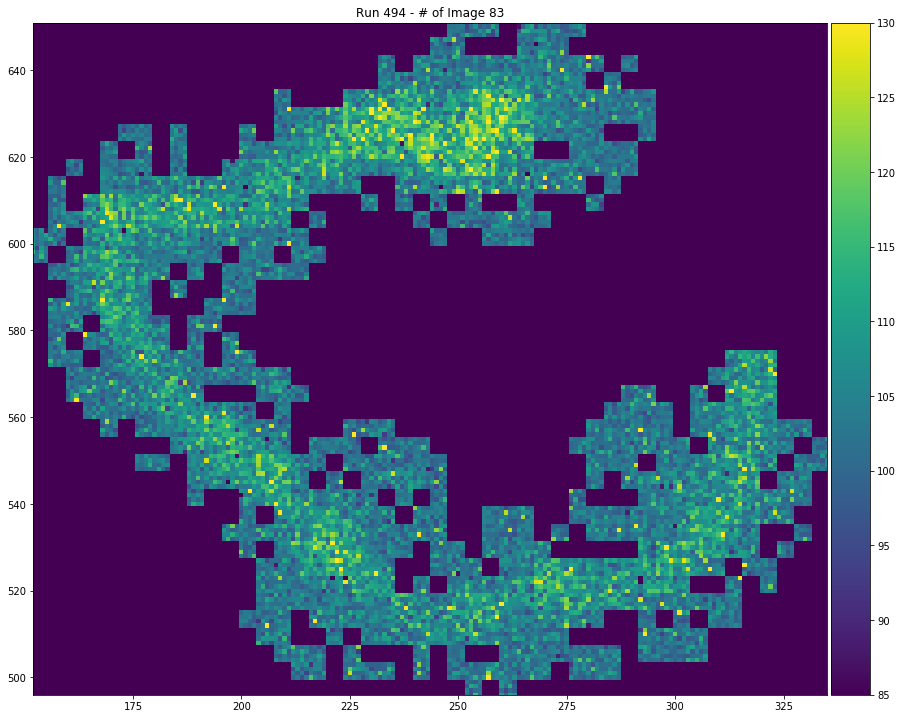

Press <ret> to continue -> 


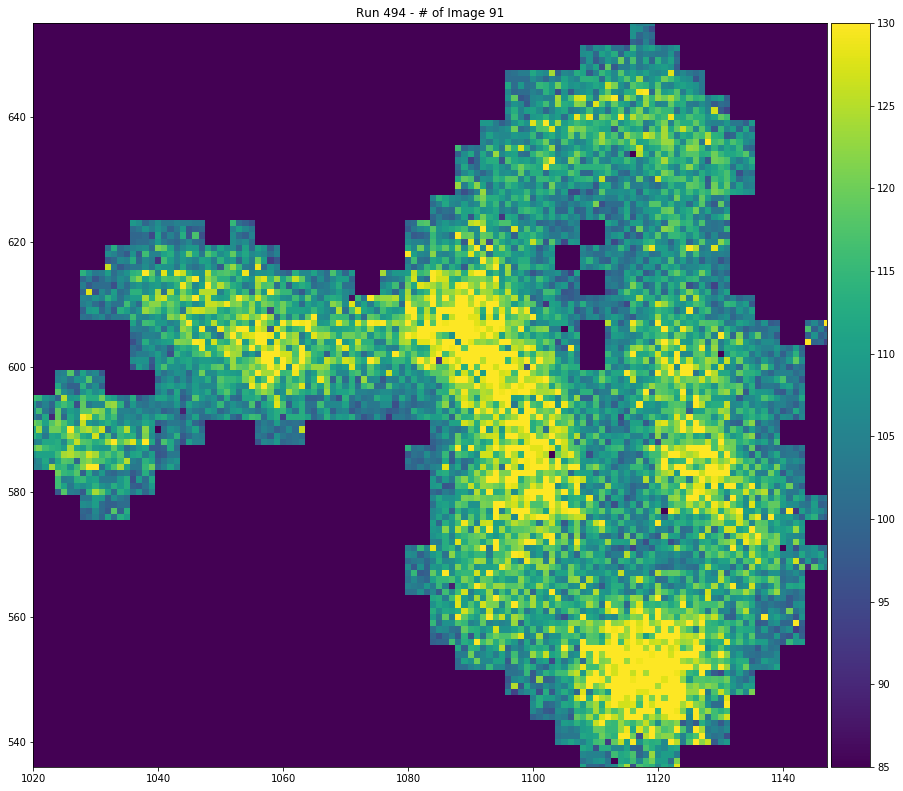

Press <ret> to continue -> 


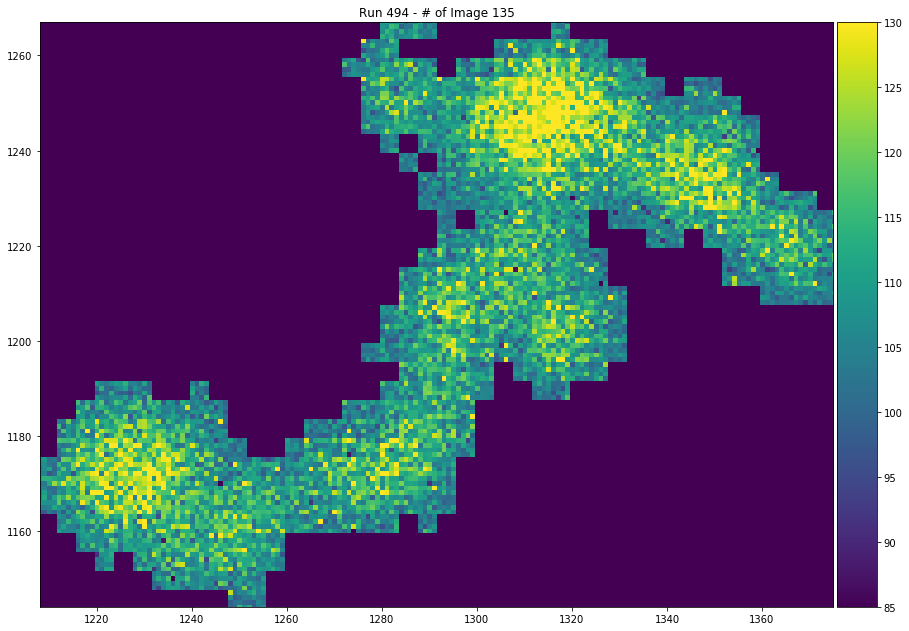

Press <ret> to continue -> 


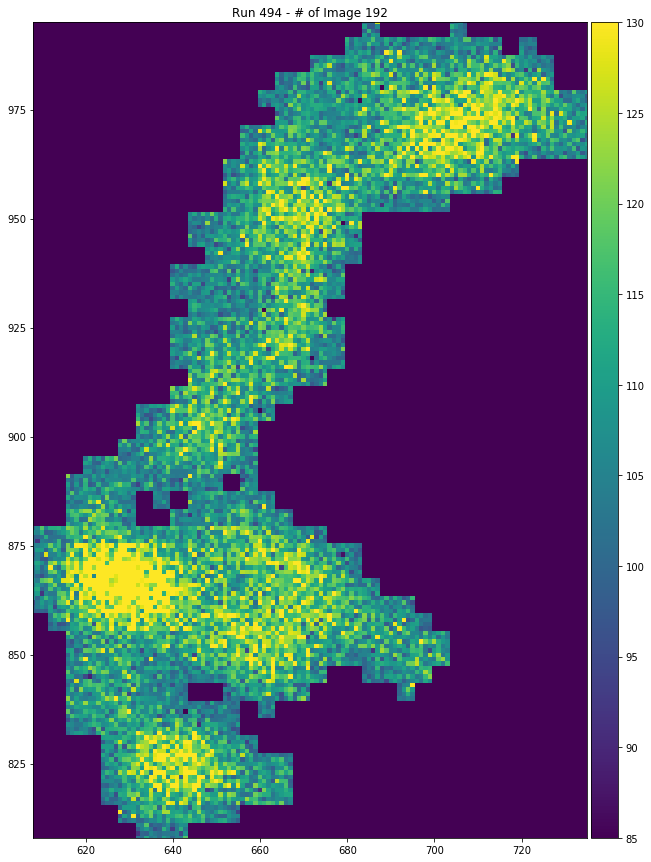

Press <ret> to continue -> 


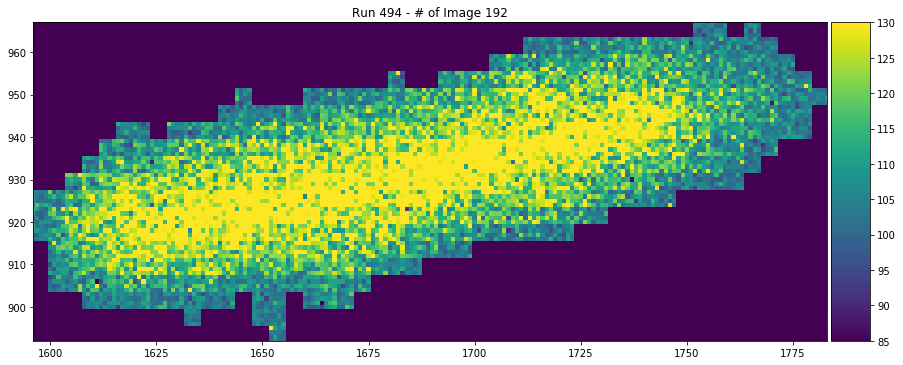

Press <ret> to continue -> 


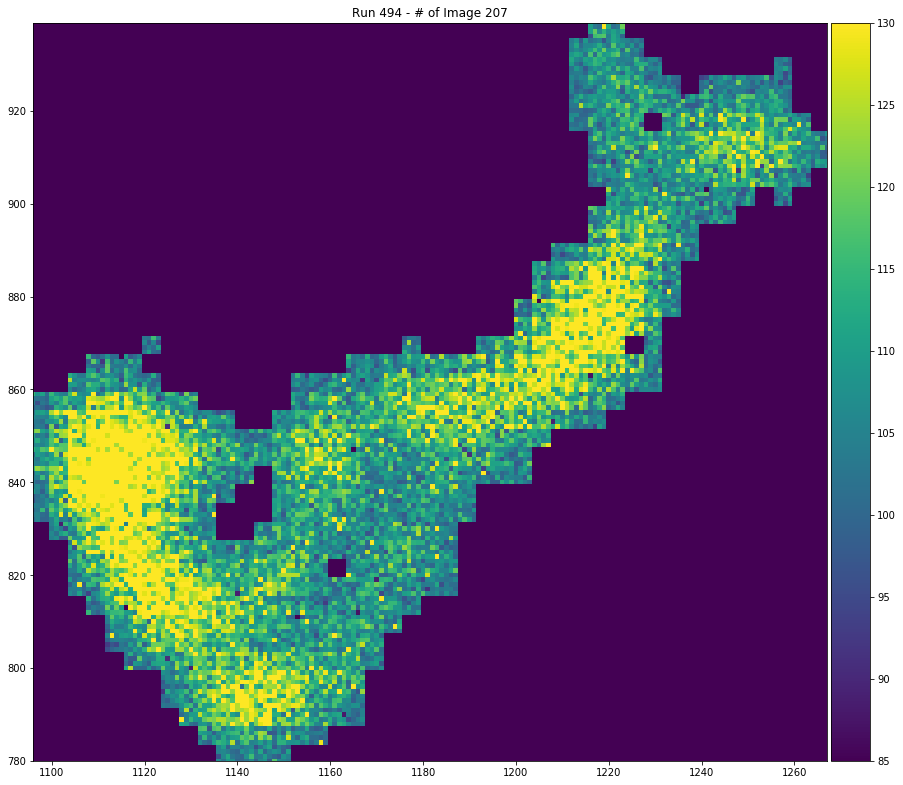

Press <ret> to continue -> 


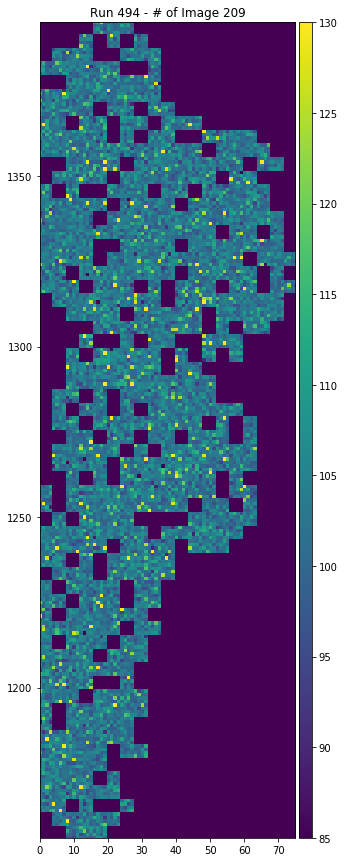

Press <ret> to continue -> 


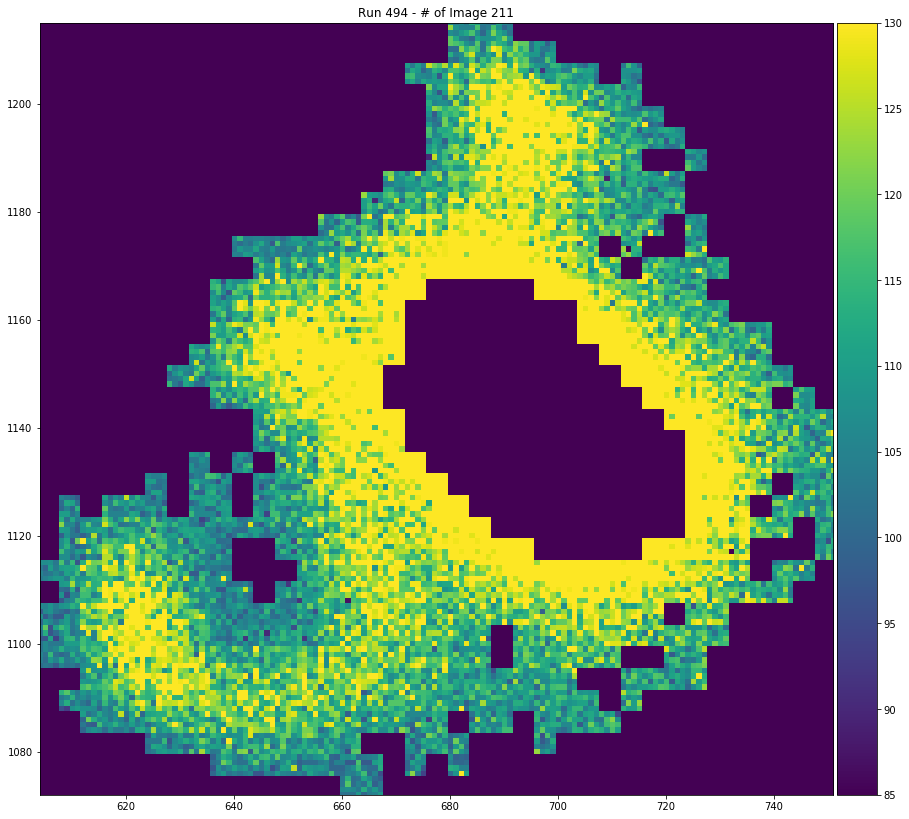

Press <ret> to continue -> 


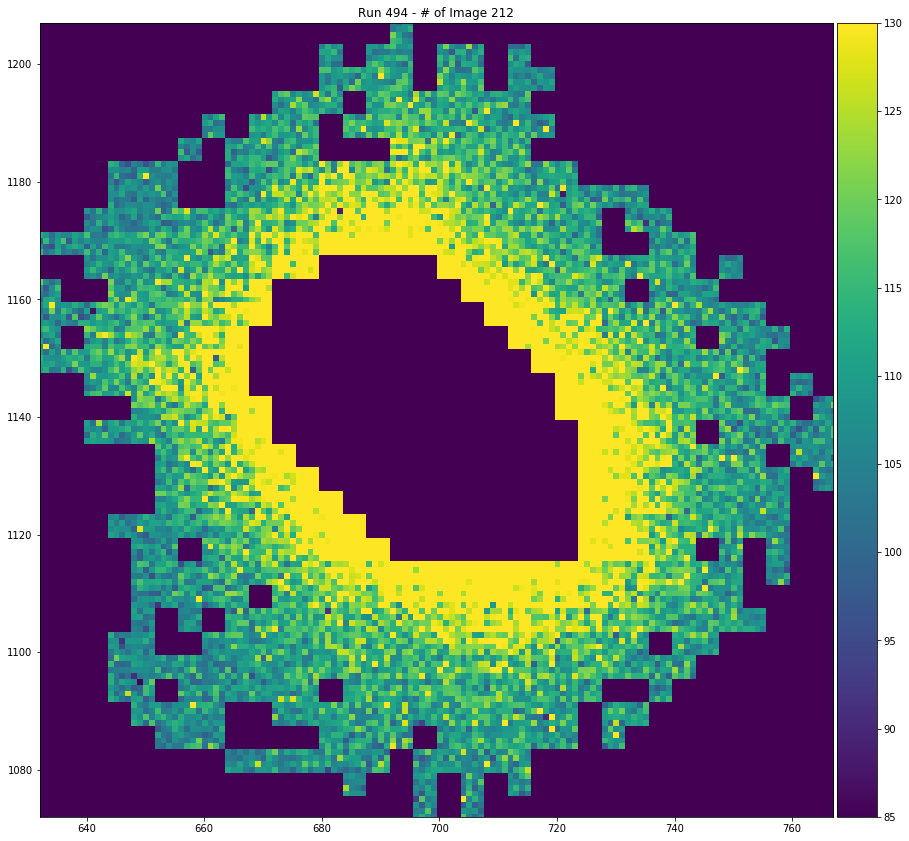

Press <ret> to continue -> 


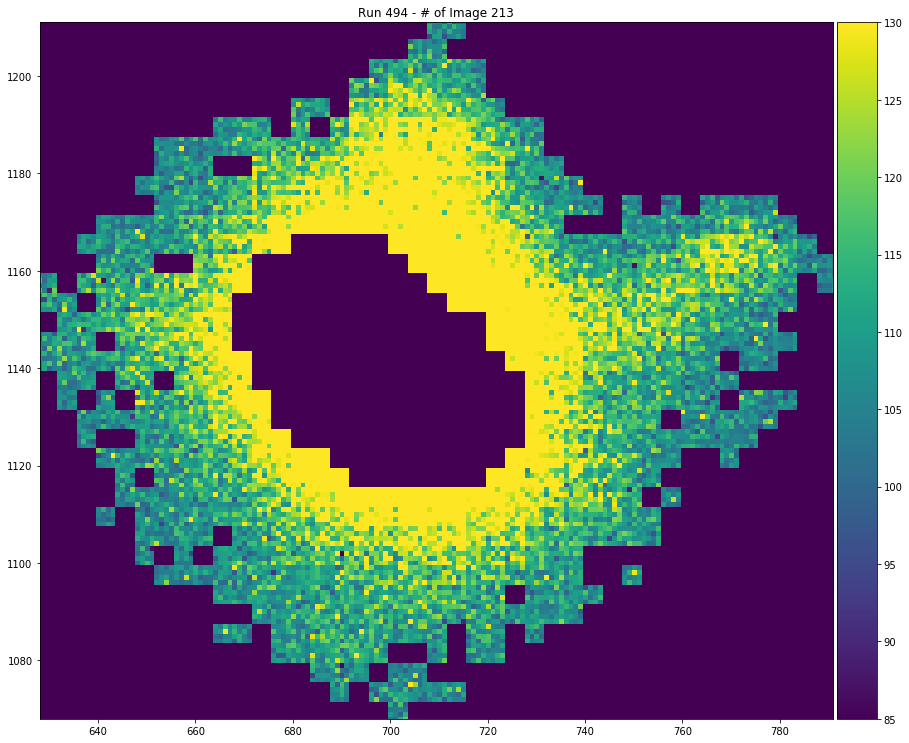

Press <ret> to continue -> 


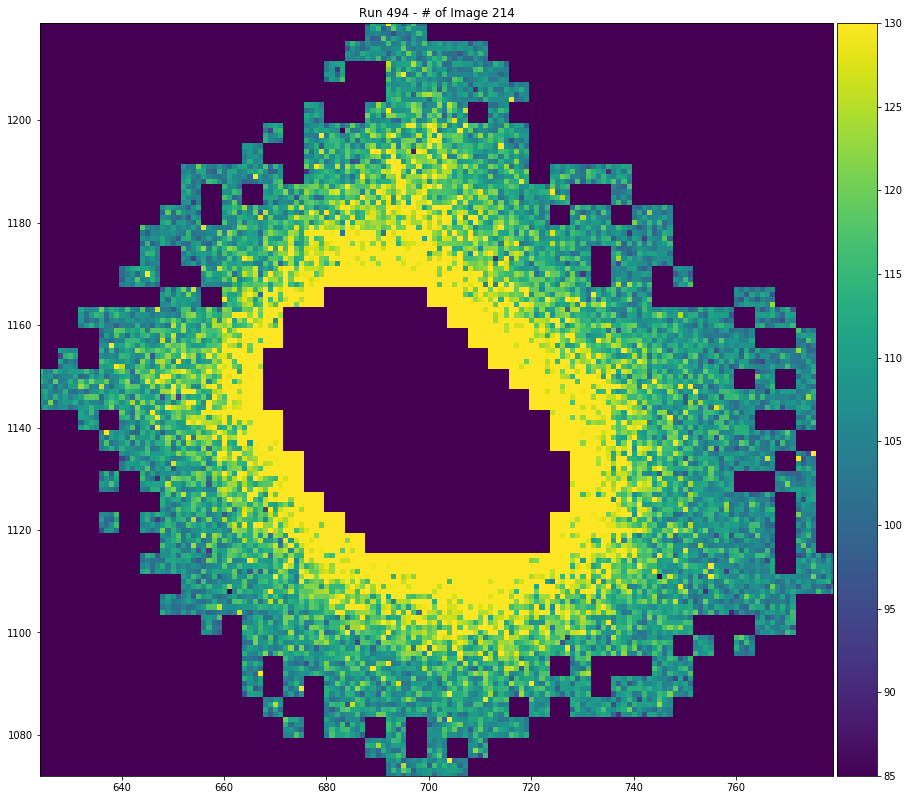

Press <ret> to continue -> stop


In [32]:
tag = 'l'
for cluN in ttt:

    #cluN = 91 ## Specified Cluster

    Run = df[colhead[0]][cluN]
    Nim = df[colhead[1]][cluN]
    Xi  = df[colhead[3]][cluN]
    Yi  = df[colhead[4]][cluN]
    Lp  = df[colhead[5]][cluN]
    Lb  = df[colhead[6]][cluN]

    matrix = np.zeros([y_resolution,x_resolution],dtype=int)
    matrixb = np.zeros([y_resolution,x_resolution],dtype=int)
    
    matrix[Yi,Xi]=Lp
    matrixb[Yi,Xi]=Lb
    
    fig = plt.figure(figsize=(15,15))
    ax  = plt.gca()
    iax = ax.imshow(matrix,cmap="viridis", vmin=85,vmax=130)
    ax.set_ylim(np.min(Yi),np.max(Yi))
    ax.set_xlim(np.min(Xi),np.max(Xi))
    ax.set_title('Run %d - # of Image %d' % (Run, Nim))
    tl.colorbar(iax)
    plt.show(block=False)    
    
    key = input('Press <ret> to continue -> ')
    if key == 'stop':
        break
    plt.close

## Developing 

In [16]:
featuresL = variables[variables.Tag == 'l'].copy()
featuresL.head(n = 10)

,Run,Image,Tag,SumLight,SumPedestal,SumPixels,PhotonPPixels,XYCorrelation,LightPPixel
91,494,1,l,5806608.0,5286927.0,50992.0,10.191422,0.995024,113.872921
1231,494,16,l,2458209.0,2248363.0,21680.0,9.679244,0.373952,113.386024
1317,494,17,l,1253232.0,1130440.0,10928.0,11.236457,0.079112,114.680820
1318,494,17,l,939595.0,843689.0,8176.0,11.730186,0.965830,114.921111
1955,494,24,l,2821348.0,2527418.0,24432.0,12.030534,0.996211,115.477570
2157,494,26,l,1837777.0,1642448.0,15744.0,12.406568,0.947466,116.728722
2563,494,31,l,848350.0,766691.0,7392.0,11.046943,0.211396,114.765963
3279,494,40,l,1056796.0,967458.0,9296.0,9.610370,0.923060,113.682874
3359,494,41,l,13540258.0,11898355.0,114128.0,14.386505,0.032683,118.640982
3468,494,42,l,1000498.0,916990.0,8864.0,9.421029,0.940581,112.872067


In [17]:
maxLX = np.zeros(featuresL.shape[0],dtype=float)
maxLY = np.zeros(featuresL.shape[0],dtype=float)
meanLX = np.zeros(featuresL.shape[0],dtype=float)
meanLY = np.zeros(featuresL.shape[0],dtype=float)

In [33]:
tag = 'l'
debug = False
it = -1 
for cluN in [91]:#df[df['Tag'] == tag].index:
    ind = cluN
    it += 1

    angle = tl.getAngle(df.X[ind],df.Y[ind])
    
    newX,newY = tl.rotate(df.X[ind][0],df.Y[ind][0],df.X[ind],df.Y[ind],angle)

    if debug:
        z = np.polyfit(df.X[ind],df.Y[ind], 1)
        func = np.poly1d(z)

        xp = np.linspace(np.min(df.X[ind]), np.max(df.X[ind]), 100)

        z1 = np.polyfit(newX,newY, 1)
        func1 = np.poly1d(z1)

        xp1 = np.linspace(np.min(newX), np.max(newX), 100)

        plt.plot(df.X[ind],df.Y[ind], '.', xp, func(xp), '-')
        #plt.hold()
        plt.plot(newX,newY, '.r', xp1, func1(xp1), '-k')
        plt.plot(df.X[ind][0],df.Y[ind][0], 'og')
        plt.plot(newX[0],newY[0], 'oy')
        plt.xlim(0,2048)
        plt.ylim(0,2048)
        plt.axis('square')
        plt.title("Rotation Angle: %.2f" % (degrees(angle)))
        plt.legend(["Cluster", "Fit","Rotated Cluster","New Fit"])
        plt.show()

        key = input('Press <ret> to continue -> ')
        if key == 'stop':
            break

        plt.close()
    
    # Calculatin length in X and Y
    maxLX[it] = (np.max(newX) - np.min(newX))
    maxLY[it] = (np.max(newY) - np.min(newY))

    meanLY[it] = np.mean(get_sliceleng(X = newX,Y = newY,pieces = 40))
    meanLX[it] = np.mean(get_sliceleng(X = newY,Y = newX,pieces = 5))

/home/igorabritta/cygno/toolslib.py:174: RankWarning: Polyfit may be poorly conditioned
  zo = polyfit(yo,xo, 1)


In [22]:
# Insertion in the table
featuresL.insert(9,'MaxLengthX',maxLX)
featuresL.insert(10,'MaxLengthY',maxLY)
featuresL.insert(11,'MeanLengthX',meanLX)
featuresL.insert(12,'MeanLengthY',meanLY)

In [31]:
ttt = featuresL.index[(featuresL.MaxLengthX > 0) & (featuresL.MaxLengthX < 200)]

In [24]:
featuresL[featuresL.MaxLengthX < 250].head(n=100)

,Run,Image,Tag,SumLight,SumPedestal,SumPixels,PhotonPPixels,XYCorrelation,LightPPixel,MaxLengthX,MaxLengthY,MeanLengthX,MeanLengthY
5480,494,66,l,1028342.0,966280.0,9344.0,6.641909,0.810184,110.053724,224.297449,97.470083,184.725854,51.207099
6931,494,83,l,1239130.0,1198118.0,11680.0,3.511301,0.242340,106.089897,190.635039,162.085315,152.231595,99.563124
7819,494,91,l,847465.0,775509.0,7488.0,9.609509,0.147698,113.176416,129.399346,119.433934,103.237441,63.837414
11514,494,130,l,1024095.0,941210.0,9056.0,9.152496,0.696072,113.084695,203.448575,120.598909,133.996207,49.774417
11936,494,135,l,854625.0,791865.0,7616.0,8.240546,0.688191,112.214417,176.657180,99.003686,138.379474,49.680265
16798,494,192,l,1083540.0,995083.0,9584.0,9.229654,0.637070,113.057179,199.401074,116.000032,157.088108,54.529581
16799,494,192,l,902084.0,788101.0,7584.0,15.029404,0.611545,118.945675,190.225219,60.009074,176.018526,41.305965
17988,494,207,l,1052185.0,951749.0,9168.0,10.955061,0.748618,114.767125,192.566691,100.550216,161.895401,52.898663
18083,494,209,l,965660.0,948860.0,9280.0,1.810345,0.267739,104.058190,178.898665,184.168722,105.970223,67.621889
18298,494,210,l,1262621.0,1162598.0,11216.0,8.917885,0.437721,112.573199,203.372734,172.103602,119.783861,66.356365


/usr/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


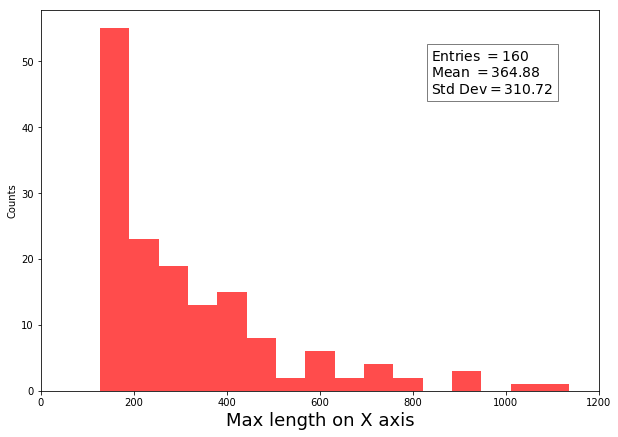

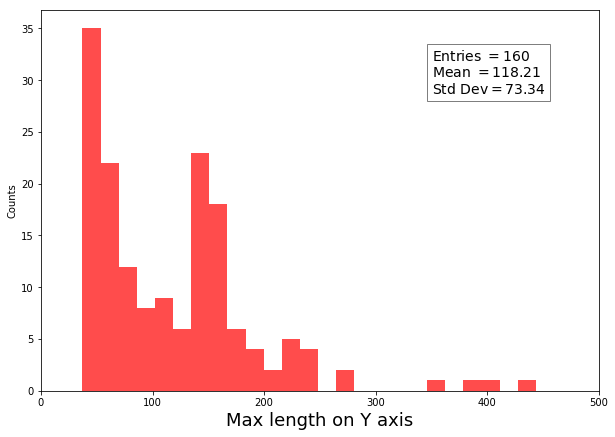

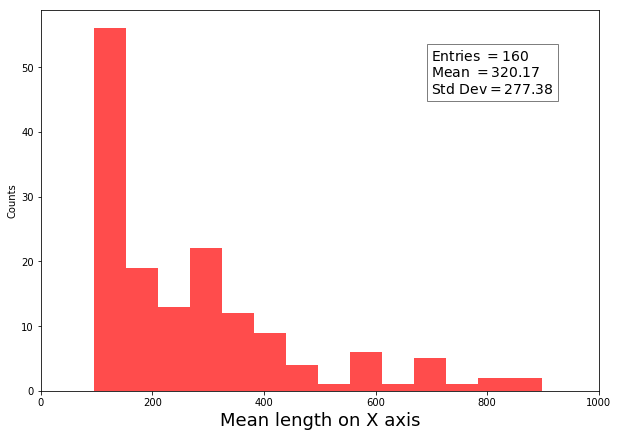

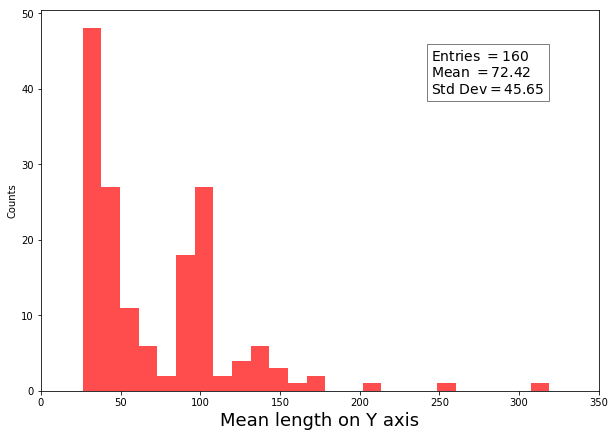

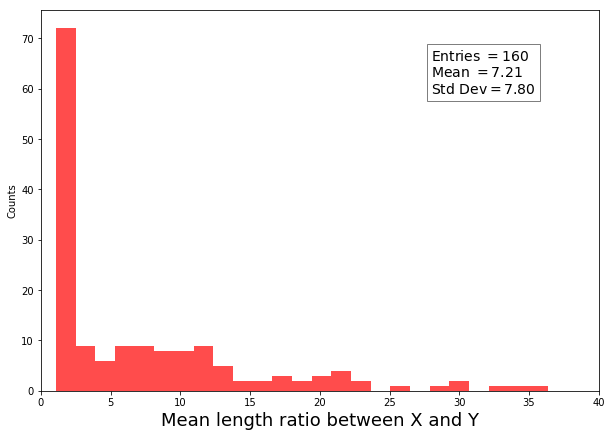

In [28]:
plot1hist(featuresL.MaxLengthX, bins = 25, liml = 0, limr = 1200, label='Max length on X axis', logx = False, logy = False, density=False)
plot1hist(featuresL.MaxLengthY, bins = 25, liml = 0, limr = 500, label='Max length on Y axis', logx = False, logy = False, density=False)
plot1hist(featuresL.MeanLengthX, bins = 25, liml = 0, limr = 1000, label='Mean length on X axis', logx = False, logy = False, density=False)
plot1hist(featuresL.MeanLengthY, bins = 25, liml = 0, limr = 350, label='Mean length on Y axis', logx = False, logy = False, density=False)
plot1hist(featuresL.MeanLengthX/featuresL.MeanLengthY, bins = 25, liml = 0, limr = 40, label='Mean length ratio between X and Y', logx = False, logy = False, density=False)

In [43]:
pieces = 40
    
L    = np.array(df.Light[91])
P    = np.array(df.Pedestal[91])
newX = np.array(newX) # Direction of the slices
newY = np.array(newY) # Direction of the Mean Length

slices = np.linspace(np.min(newX),np.max(newX),pieces)
meanLY = np.zeros([(pieces-1),],dtype=float)

for i in [0]:#range(0,(pieces-1)):

    y = newY[(newX > slices[i]) & (newX < slices[i+1])]
    x = newX[(newX > slices[i]) & (newX < slices[i+1])]
    z = L[(newX > slices[i]) & (newX < slices[i+1])]

/usr/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


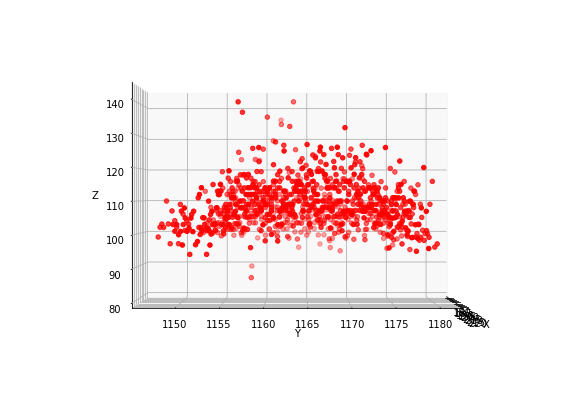

In [60]:
pl3d(x, y, z, azim=0, bottom = 80)

In [58]:
def pl3d(X,Y,Z,azim=0, bottom = 80):

    from mpl_toolkits.mplot3d import Axes3D
    import matplotlib.pyplot as plt



    fig = plt.figure(figsize=(10,7))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(X, Y, Z, c='r', marker='o')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_zlim(bottom = bottom)
    ax.view_init(elev=0., azim=azim)

    plt.show()

In [20]:
def get_sliceleng(X,Y,pieces):
    # Function to get the mean length of the cluster
    # in X or Y direction.
    pieces = pieces
    
    newX = np.array(X) # Direction of the slices
    newY = np.array(Y) # Direction of the Mean Length
    
    slices = np.linspace(np.min(newX),np.max(newX),pieces)
    meanLY = np.zeros([(pieces-1),],dtype=float)

    for i in range(0,(pieces-1)):
    
        y = newY[(newX > slices[i]) & (newX < slices[i+1])]
        meanLY[i] = np.max(y) - np.min(y)
    return meanLY

In [19]:
def plot1hist(variable, bins, liml = 0, limr = 50, label = '', density = True, logx = False, logy = False):
    ## Function to show one variable on a histogram
    
    # variable = is a 1xN List with the variable information                       - List
    # nins     = is the number of bins to construct the histogram                  - int
    # nsd      = is the multiplication factor of the sigma to define the Xlim min  - float
    # nse      = is the multiplication factor of the sigma to define the Xlim max  - float
    # label    = is the Xlabel to show in the plot                                 - string
    # density  = is the flag to set the histogram to show the density or not       - Boolean
    # logx     = is the flag to set the X axis to log on the histogram or not      - Boolean
    # logy     = is the flag to set the Y axis to log on the histogram or not      - Boolean
    
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(10,7))
    ax  = fig.add_subplot(111)
    
    v2  = variable
    e   = np.size(v2)
    m   = np.mean(v2[(v2 != 0) & (np.isnan(v2) == False)])
    s   = np.std(v2[(v2 != 0) & (np.isnan(v2) == False)])
    
    plt.hist(variable, bins=bins, fc='r', alpha = 0.7, density=density)
    plt.xlim([liml, limr])
    
    if logx:
        plt.xscale("log")
    if logy:
        plt.yscale("log")
    if density:
        plt.ylabel('Probability')
    else:
        plt.ylabel('Counts')
    plt.xlabel(label,fontsize=18)
    #plt.legend(['Recoils', 'Soft Electrons', 'MeV Electrons'],prop={'size': 18})

    textstr = '\n'.join((
        r'Entries $=%d$' % (e, ),
        r'Mean $=%.2f$' % (m, ),
        r'Std Dev$ =%.2f$' % (s, )))

    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='square', facecolor='white', alpha=0.5)

    # place a text box in upper left in axes coords
    plt.text(0.7, 0.9, textstr, fontsize=14,
            verticalalignment='top',transform=ax.transAxes, bbox=props)
    
    plt.show()